# Manifold Learning: t-SNE & UMAP

PCA is great, but it's **Linear**. It flattens data like a pancake.
But what if our data is crumpled up like a paper ball? Or rolled up like a Swiss Roll?

### The Problem with PCA
PCA tries to draw a straight line through the data. If the data is curved, PCA fails to capture the structure.

### The Solution: Manifold Learning
Algorithms like **t-SNE** and **UMAP** are Non-Linear. They measure distances between neighbors and try to preserve those local neighborhoods in 2D, effectively "unfolding" the data.

In [1]:
# Install UMAP if needed
# !pip install umap-learn

## Load Data (Digits)
We'll use the **MNIST Digits** dataset (8x8 pixel images of handwritten numbers). 
It has **64 dimensions** (pixels). Let's see if we can separate the numbers 0-9 in 2D.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

digits = load_digits()
X = digits.data
y = digits.target

print(f"Data Shape: {X.shape} (64 Dimensions)")

# Scale the data (Always!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Data Shape: (1797, 64) (64 Dimensions)


## The Baseline: PCA
Let's see how well PCA does. It usually creates a "blob" where some numbers overlap.

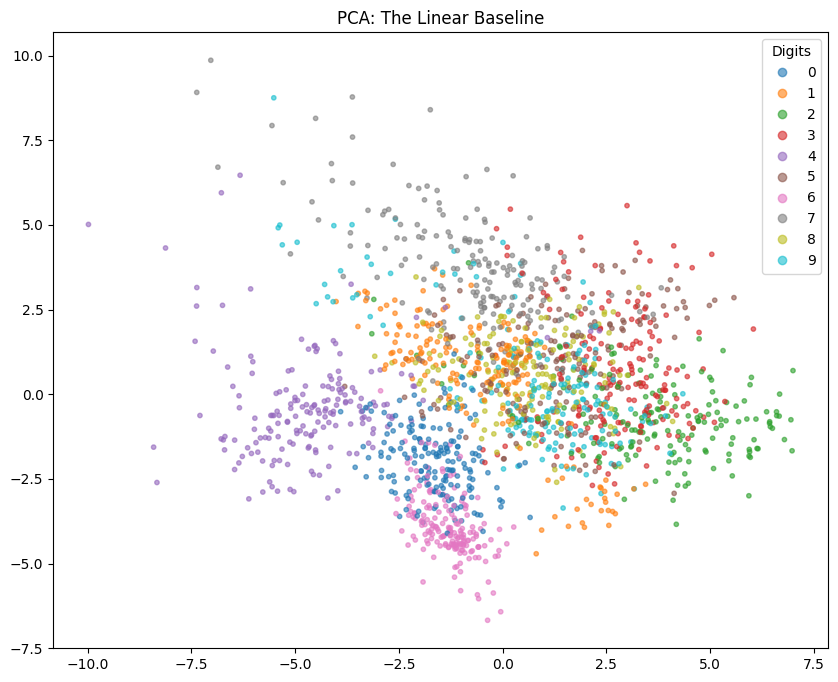

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.6, s=10)
plt.legend(handles=scatter.legend_elements()[0], labels=range(10), title="Digits")
plt.title("PCA: The Linear Baseline")
plt.show()

## t-SNE (t-Distributed Stochastic Neighbor Embedding)
This was the state-of-the-art for visualization for years. It's probabilistic.
- **Pros:** Beautiful, clear clusters.
- **Cons:** Slow on large data. Global structure is often lost (distances between clusters don't mean much).

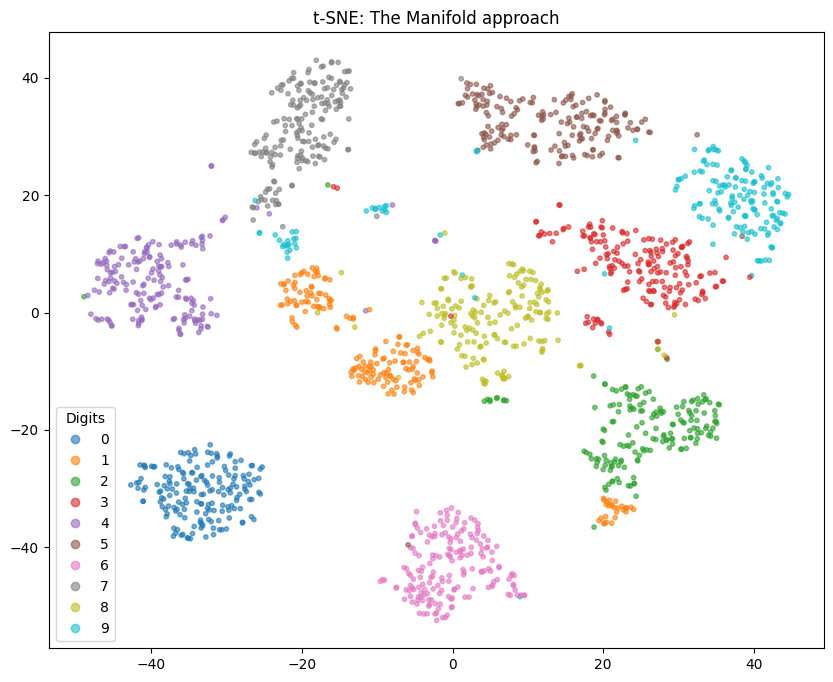

In [4]:
from sklearn.manifold import TSNE

# Perplexity is essentially "number of neighbors to consider"
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_jobs=-1)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', alpha=0.6, s=10)
plt.legend(handles=scatter.legend_elements()[0], labels=range(10), title="Digits")
plt.title("t-SNE: The Manifold approach")
plt.show()

## UMAP (Uniform Manifold Approximation and Projection)
The new king (since ~2018).
- **Pros:** Faster than t-SNE. Preserves Global Structure better.
- **Cons:** Requires `umap-learn` library (not in standard sklearn).

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


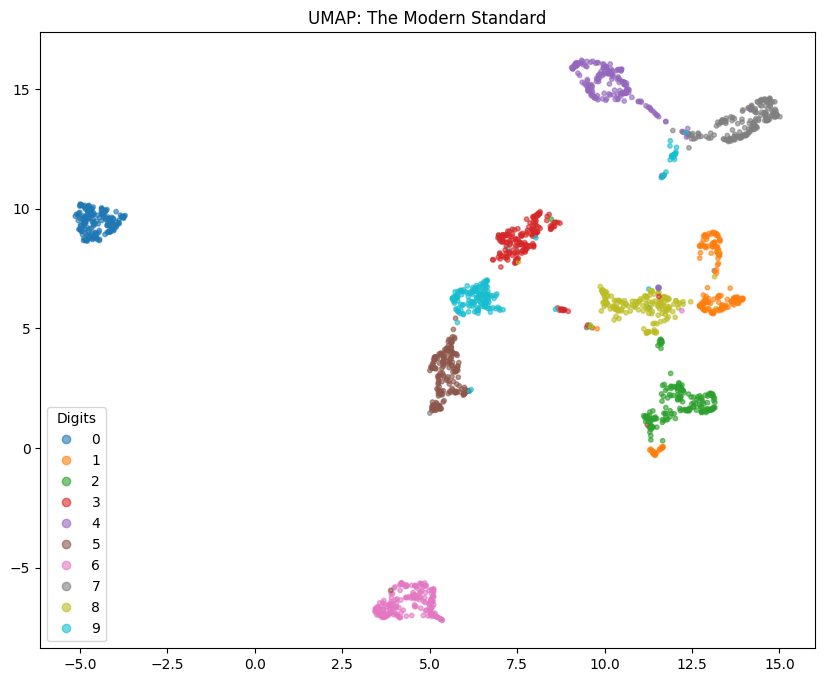

In [5]:
try:
    import umap
    
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
    X_umap = reducer.fit_transform(X_scaled)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab10', alpha=0.6, s=10)
    plt.legend(handles=scatter.legend_elements()[0], labels=range(10), title="Digits")
    plt.title("UMAP: The Modern Standard")
    plt.show()
except ImportError:
    print("UMAP is not installed. Run '!pip install umap-learn' to see this plot.")

### Comparison / Conclusion
1.  **PCA:** Look at how the colors (digits) often overlap. It struggles to separate similar digits (like 3 and 8) entirely.
2.  **t-SNE:** Boom. Distinct islands. The "3" cluster is totally separate from the "8" cluster. It "unraveled" the knot.
3.  **UMAP:** Similar to t-SNE (distinct islands) but usually computes faster and keeps similar digits closer together globally.

Use **t-SNE/UMAP** whenever you need to visualize complex, high-dimensional data (Images, Text Embeddings, etc.).